In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('D:/데이터/IGAWorks/0203_temp.csv')

In [3]:
data.head()

,click,event_datetime,bid_id,ssp_id,campaign_id,adset_id,placement_type,media_id,media_name,media_bundle,...,gender,marry,install_pack,cate_code,predicted_house_price,asset_index,day,hour,day_of_week,holiday
0,0,2019-10-01 00:00:05.289,aAEDD9AeIv,SrN77Arvqh,2T5sOm2MoW,UASfSkWw7S,1pcQ3RJgQt,hkFCnTpDpn,Xbdchs5uK3,7jwRHIrTWJ,...,M,S,"p27648g,p38947g,p39241g,p12968g,p10883g,p26661...","19001:3,21001:4,03003:2,22002:2,06002:4,04001:...",10000.0,NaN,1,0,Tuesday,0
1,0,2019-10-02 01:50:55.776,120KZBpPEp,SrN77Arvqh,2T5sOm2MoW,UASfSkWw7S,1pcQ3RJgQt,hkFCnTpDpn,Xbdchs5uK3,7jwRHIrTWJ,...,M,S,"p27648g,p38947g,p39241g,p12968g,p10883g,p26661...","19001:3,21001:4,03003:2,22002:2,06002:4,04001:...",10000.0,NaN,2,1,Wednesday,0
2,0,2019-10-03 07:30:56.756,AMFiNF3X7r,SrN77Arvqh,2T5sOm2MoW,VgrjQr7onn,1pcQ3RJgQt,hkFCnTpDpn,Xbdchs5uK3,7jwRHIrTWJ,...,M,S,"p27648g,p38947g,p39241g,p12968g,p10883g,p26661...","19001:3,21001:4,03003:2,22002:2,06002:4,04001:...",10000.0,NaN,3,7,Thursday,1
3,0,2019-10-07 00:15:31.816,Mza3hx3DOX,Uox85xVMSC,tNKbpmcA5g,qhiItTZT3T,kIeE1J0KCa,9bC9qJ87qL,YJ1AErf0W7,eQc8dY09AQ,...,M,S,"p27648g,p38947g,p39241g,p12968g,p10883g,p26661...","19001:3,21001:4,03003:2,22002:2,06002:4,04001:...",10000.0,NaN,7,0,Monday,0
4,0,2019-10-09 15:01:40.412,4GbWwwNnJZ,SrN77Arvqh,2T5sOm2MoW,VgrjQr7onn,1pcQ3RJgQt,hkFCnTpDpn,Xbdchs5uK3,30Vj8EQm56,...,M,S,"p27648g,p38947g,p39241g,p12968g,p10883g,p26661...","19001:3,21001:4,03003:2,22002:2,06002:4,04001:...",10000.0,NaN,9,15,Wednesday,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232520 entries, 0 to 2232519
Data columns (total 36 columns):
click                     int64
event_datetime            object
bid_id                    object
ssp_id                    object
campaign_id               object
adset_id                  object
placement_type            object
media_id                  object
media_name                object
media_bundle              object
media_domain              object
publisher_id              object
publisher_name            object
device_ifa                object
device_os                 object
device_os_version         object
device_model              object
device_carrier            object
device_make               object
device_connection_type    object
device_language           object
device_country            object
device_region             object
device_city               object
advertisement_id          object
age                       int64
gender                    objec

In [5]:
data.columns

Index(['click', 'event_datetime', 'bid_id', 'ssp_id', 'campaign_id',
       'adset_id', 'placement_type', 'media_id', 'media_name', 'media_bundle',
       'media_domain', 'publisher_id', 'publisher_name', 'device_ifa',
       'device_os', 'device_os_version', 'device_model', 'device_carrier',
       'device_make', 'device_connection_type', 'device_language',
       'device_country', 'device_region', 'device_city', 'advertisement_id',
       'age', 'gender', 'marry', 'install_pack', 'cate_code',
       'predicted_house_price', 'asset_index', 'day', 'hour', 'day_of_week',
       'holiday'],
      dtype='object')

In [6]:
# 11일째 데이터 제외
# 1~9일째 데이터를 train으로 10일째 클릭을 예측하는 것으로 연구 문제 변경 

df = data[data['day'] != 11]

In [7]:
df.shape

(2232370, 36)

In [8]:
for i in df.columns:
    print(i + " : " + str(df[i].nunique()))

click : 2
event_datetime : 2228719
bid_id : 2232370
ssp_id : 17
campaign_id : 178
adset_id : 844
placement_type : 4
media_id : 4041
media_name : 4520
media_bundle : 3881
media_domain : 135
publisher_id : 2808
publisher_name : 981
device_ifa : 767197
device_os : 1
device_os_version : 54
device_model : 778
device_carrier : 347
device_make : 181
device_connection_type : 8
device_language : 23
device_country : 1
device_region : 130
device_city : 983
advertisement_id : 28
age : 12
gender : 2
marry : 2
install_pack : 767197
cate_code : 767197
predicted_house_price : 3466
asset_index : 0
day : 10
hour : 24
day_of_week : 7
holiday : 2


* 모델 input 할때 drop할 변수들: 'event_datetime' , 'bid_id', 'device_os' , 'device_country', 'asset_index'

* one-hot encoding: 'placement_type', 'gender'. 'day_of_week'

* 범주 줄여서 one-hot encoding: 'device_connection_type'

* encoding 안해도 됨: 'age'

* binary encoding: 'marry'

* 결측치 처리: 'predicted_house_price'

### 1. 필요 없는 변수 drop (일단 event_datetime, bid_id는 남겨 놓기)

In [9]:
df = df.drop(['device_os' , 'device_country', 'asset_index'] , axis=1)

### 2. one-hot encoding

In [10]:
df = df.join(pd.get_dummies(df['placement_type'], prefix='placement_type', drop_first=True))

In [11]:
df = df.join(pd.get_dummies(df['gender'], prefix='gender', drop_first=True))

In [12]:
df = df.join(pd.get_dummies(df['day_of_week'], prefix='day_of_week', drop_first=True))

In [13]:
df = df.drop(['placement_type', 'gender', 'day_of_week'] , axis=1) # 원래 변수 drop

### 3. 범주 줄여서 one-hot encoding

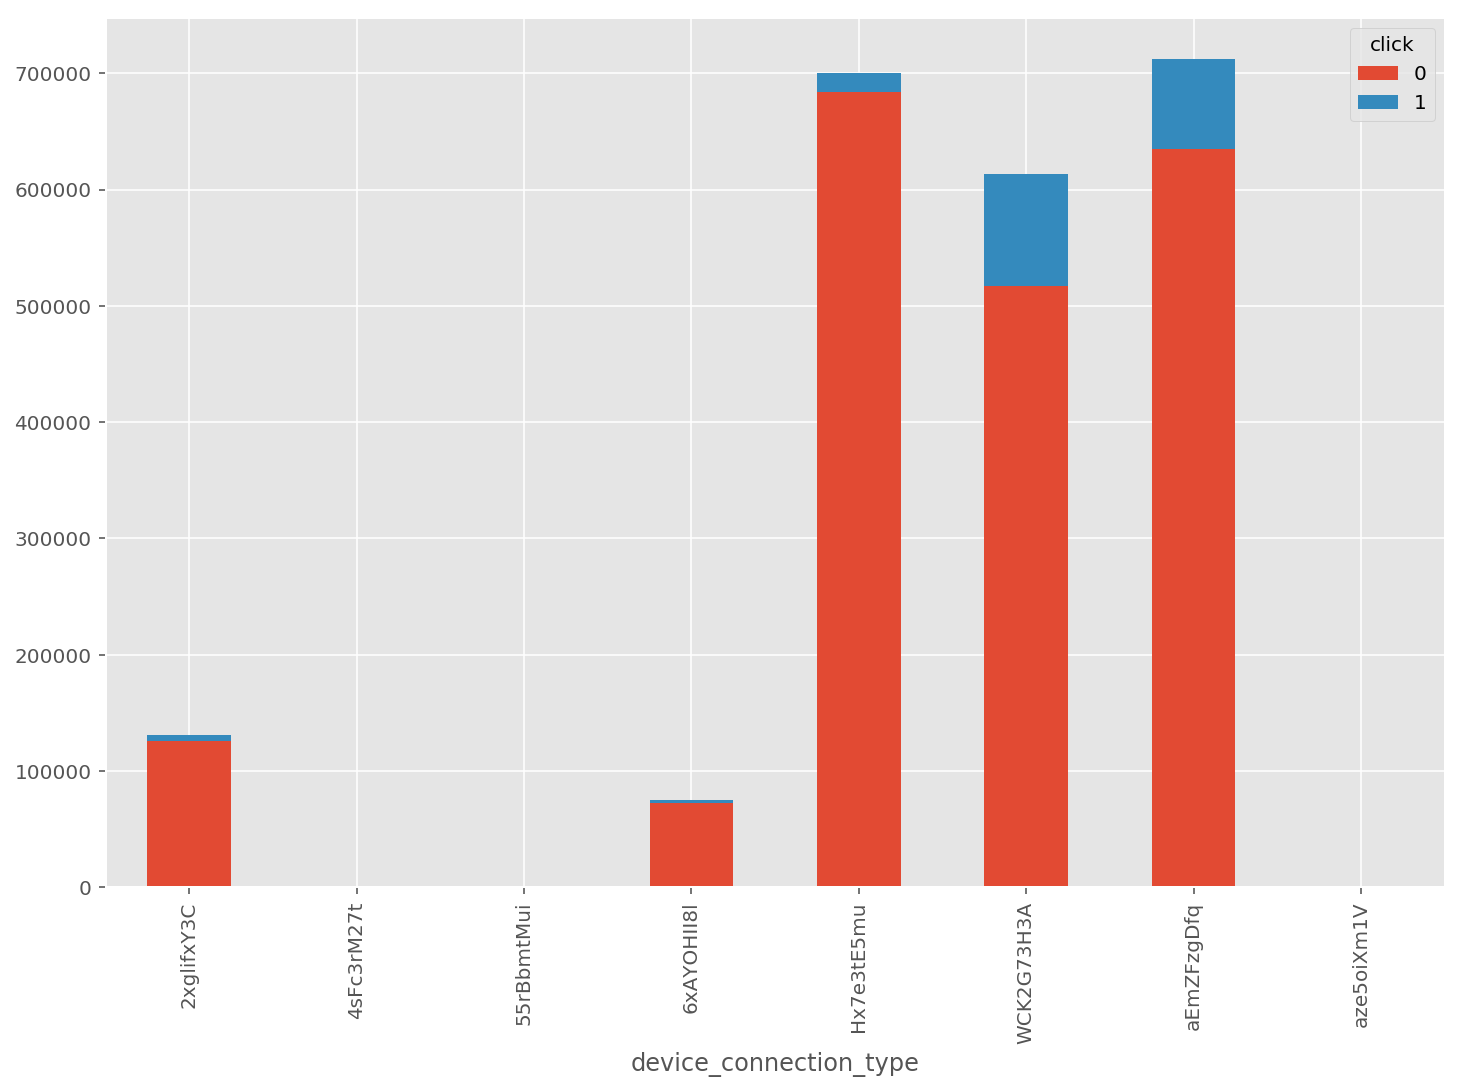

In [14]:
temp = df.groupby('device_connection_type')['click'].value_counts()
temp.unstack().plot.bar(stacked=True , figsize=(12,8) )

In [15]:
df['device_connection_type'].value_counts()

aEmZFzgDfq    712077
Hx7e3tE5mu    700453
WCK2G73H3A    613542
2xglifxY3C    130923
6xAYOHII8l     75196
4sFc3rM27t       162
aze5oiXm1V        13
55rBbmtMui         4
Name: device_connection_type, dtype: int64

In [16]:
def get_device_connection_type(x):
    if x in ['2xglifxY3C', '6xAYOHII8l','4sFc3rM27t', 'aze5oiXm1V', '55rBbmtMui']:
        return 'else'
    else:
        return x

In [17]:
df['device_connection_type'] = df['device_connection_type'].apply(get_device_connection_type)

In [18]:
df = df.join(pd.get_dummies(df['device_connection_type'], prefix='device_connection_type', drop_first=True))

In [19]:
df = df.drop(['device_connection_type'] , axis=1) # 원래 변수 drop

### 4. binary encoding

In [20]:
def get_marry(x):
    if x == 'M':
        return 1
    else:
        return 0

In [21]:
df['marry']

0          S
1          S
2          S
3          S
4          S
          ..
2232477    S
2232478    S
2232479    M
2232480    M
2232481    M
Name: marry, Length: 2232370, dtype: object

In [22]:
df['marry'] = df['marry'].apply(get_marry)

### 5. 결측치 처리: 'predicted_house_price'

In [23]:
df['predicted_house_price'].isnull().sum()

374422

In [24]:
temp = data[data['day'] != 11]

In [25]:
# 연령, 성별, 기혼여부에 따라 그룹화된 그룹별 평균으로 대체
df['predicted_house_price'] = temp.groupby(['age', 'gender', 'marry'])['predicted_house_price'].transform(lambda x: round(x.fillna(x.mean())))

In [26]:
df.columns

Index(['click', 'event_datetime', 'bid_id', 'ssp_id', 'campaign_id',
       'adset_id', 'media_id', 'media_name', 'media_bundle', 'media_domain',
       'publisher_id', 'publisher_name', 'device_ifa', 'device_os_version',
       'device_model', 'device_carrier', 'device_make', 'device_language',
       'device_region', 'device_city', 'advertisement_id', 'age', 'marry',
       'install_pack', 'cate_code', 'predicted_house_price', 'day', 'hour',
       'holiday', 'placement_type_WnrXFsYXNs', 'placement_type_kIeE1J0KCa',
       'placement_type_tg9mzu7kFm', 'gender_M', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'device_connection_type_WCK2G73H3A',
       'device_connection_type_aEmZFzgDfq', 'device_connection_type_else'],
      dtype='object')

In [27]:
df.to_csv('D:/데이터/IGAWorks/reserved_encoding_data.csv' , index = False)